<a href="https://colab.research.google.com/github/PEkt/LabsAnalitic/blob/main/%D0%9B%D0%B0%D0%B16_%D0%9F%D0%BE%D0%BF%D0%BE%D0%B2%D0%B0%D0%95_%D0%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import seed
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson
seed(1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [17]:
url='https://en.wikipedia.org/wiki/List_of_highest-grossing_anime_films' #в тот раз мы с вами обсуждали, что ссылка 19 варианта не вытягивается, поэтому я взяла другую ссылку 
req=requests.get(url)
data=pd.read_html(req.text)
df=data[0]
df.head()

,Rank,Title,Studio,Worldwide gross,Year,Ref
0,1,Demon Slayer: Kimetsu no Yaiba the Movie: Muge...,Ufotable,"$474,600,000",2020,[5]
1,2,Spirited Away,Studio Ghibli,"$395,580,000",2001,[6][7]
2,3,Your Name,CoMix Wave Films,"$380,140,500",2016,[6][8]
3,4,Howl's Moving Castle,Studio Ghibli,"$235,184,110",2004,[9]
4,5,Ponyo,Studio Ghibli,"$203,204,882",2008,[10]


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             50 non-null     int64 
 1   Title            50 non-null     object
 2   Studio           50 non-null     object
 3   Worldwide gross  50 non-null     object
 4   Year             50 non-null     int64 
 5   Ref              50 non-null     object
dtypes: int64(2), object(4)
memory usage: 2.5+ KB


In [19]:
df['Worldwide gross']=df['Worldwide gross'].str.replace(r"$","").str.replace(r",","")


In [20]:
df['Worldwide gross']=df['Worldwide gross'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             50 non-null     int64 
 1   Title            50 non-null     object
 2   Studio           50 non-null     object
 3   Worldwide gross  50 non-null     int64 
 4   Year             50 non-null     int64 
 5   Ref              50 non-null     object
dtypes: int64(3), object(3)
memory usage: 2.5+ KB


In [22]:
df.drop(['Rank','Title', 'Studio', 'Ref'],axis=1,inplace=True)
df.head()

,Worldwide gross,Year
0,474600000,2020
1,395580000,2001
2,380140500,2016
3,235184110,2004
4,203204882,2008


**Визуальные проверки нормальности**

Text(0.5, 1.0, 'График гистограммы')

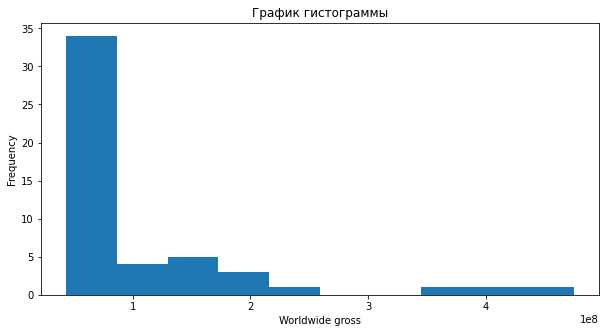

In [24]:
plt.figure(figsize=(10,5))
ax=(df['Worldwide gross']).plot.hist()
ax.set_xlabel('Worldwide gross')
ax.set_title('График гистограммы')

Text(0.5, 1.0, 'График гистограммы')

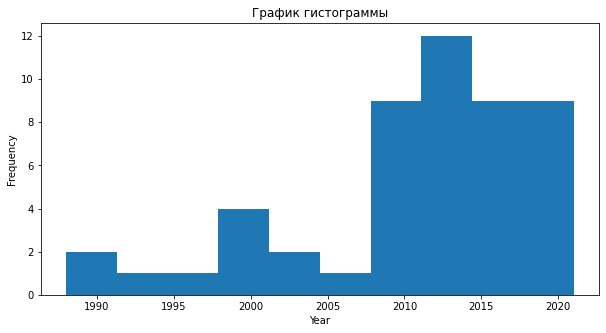

In [29]:
plt.figure(figsize=(10,5))
ax=(df['Year']).plot.hist()
ax.set_xlabel('Year')
ax.set_title('График гистограммы')

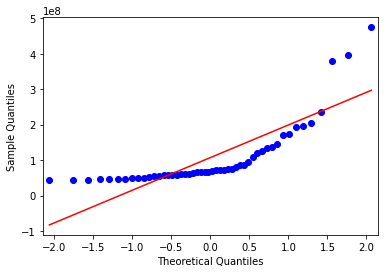

In [25]:
qqplot(df['Worldwide gross'], line='s')
plt.show()

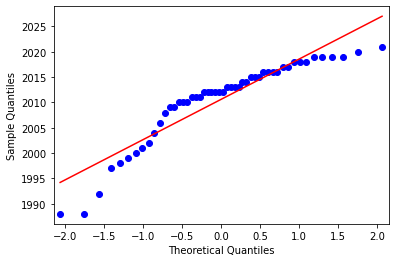

In [30]:
qqplot(df['Year'], line='s')
plt.show()

На обоих графиках, мы видим, что данные далеки от линии нормального распределения, а это значит, что данные ненормальные

**Статистические тесты нормальности**

In [26]:
# Тест Шапиро-Вилка
stat, p=shapiro(df['Worldwide gross']) 
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha=0.05
if p>alpha:
  print('Sample looks Gaussian (fail to reject H0)')
else:
  print('Sample does not looks Gaussian (reject H0)')

Statistics=0.657, p=0.000
Sample does not looks Gaussian (reject H0)


In [33]:
stat, p=shapiro(df['Year']) 
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha=0.05
if p>alpha:
  print('Sample looks Gaussian (fail to reject H0)')
else:
  print('Sample does not looks Gaussian (reject H0)')

Statistics=0.871, p=0.000
Sample does not looks Gaussian (reject H0)


Тест не прошел. Метод Шапиро-Уилка показал, что наши данные по годам и прибыльности нормальными не являются

In [27]:
# Тест д'Агостино на K^2
stat, p=normaltest(df['Worldwide gross'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha=0.05
if p>alpha:
  print('Sample looks Gaussian (fail to reject H0)')
else:
  print('Sample does not looks Gaussian (reject H0)')

Statistics=42.055, p=0.000
Sample does not looks Gaussian (reject H0)


In [32]:
stat, p=normaltest(df['Year'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha=0.05
if p>alpha:
  print('Sample looks Gaussian (fail to reject H0)')
else:
  print('Sample does not looks Gaussian (reject H0)')

Statistics=14.269, p=0.001
Sample does not looks Gaussian (reject H0)


Тест не прошел. Метод д'Агостино на K ^ 2 показал, что наши данные по годам и прибыльности нормальными не являются.

In [28]:
# Тест Андерсона-Дарлинга
result=anderson(df['Worldwide gross'])
print('Statistics=%.3f' % result.statistic)
p=0
for i in range(len(result.critical_values)):
  sl, cv=result.significance_level[i], result.critical_values[i]
  if result.statistic < result.critical_values[i]:
    print('%.3f: %.3f , data looks normal (fail to reject H0)' % (sl, cv))
  else:
    print('%.3f: %.3f , data does not looks normal (reject H0)' % (sl, cv))

Statistics=5.891
15.000: 0.538 , data does not looks normal (reject H0)
10.000: 0.613 , data does not looks normal (reject H0)
5.000: 0.736 , data does not looks normal (reject H0)
2.500: 0.858 , data does not looks normal (reject H0)
1.000: 1.021 , data does not looks normal (reject H0)


In [31]:
result=anderson(df['Year'])
print('Statistics=%.3f' % result.statistic)
p=0
for i in range(len(result.critical_values)):
  sl, cv=result.significance_level[i], result.critical_values[i]
  if result.statistic < result.critical_values[i]:
    print('%.3f: %.3f , data looks normal (fail to reject H0)' % (sl, cv))
  else:
    print('%.3f: %.3f , data does not looks normal (reject H0)' % (sl, cv))

Statistics=2.138
15.000: 0.538 , data does not looks normal (reject H0)
10.000: 0.613 , data does not looks normal (reject H0)
5.000: 0.736 , data does not looks normal (reject H0)
2.500: 0.858 , data does not looks normal (reject H0)
1.000: 1.021 , data does not looks normal (reject H0)


Тест не прошел. Метод Андерсона-Дарлинга показал, что наши данные по годам и прибыльности нормальными не являются.